In [1]:
#Importar lo necesario para la transformada
import pandas as pd
import numpy as np
import matplotlib as plt
from pylab import *
import scipy
from scipy.fftpack import fft,fftfreq, fftshift, rfft

In [2]:
df = pd.read_csv("Datos.csv", names=['Año', 'Mes', 'Año Des','Manchas','*','**'], skiprows=[0])
df.head()

,Año,Mes,Año Des,Manchas,*,**
0,1749,1,1749.042,96.7,-1.0,-1
1,1749,2,1749.123,104.3,-1.0,-1
2,1749,3,1749.204,116.7,-1.0,-1
3,1749,4,1749.288,92.8,-1.0,-1
4,1749,5,1749.371,141.7,-1.0,-1


In [3]:
df.describe()

,Año,Mes,Año Des,Manchas,*,**
count,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000
mean,1882.375350,6.495798,1882.873012,82.923561,5.610955,89.781201
std,77.304865,3.451370,77.304802,67.819418,5.234367,185.247160
min,1749.000000,1.000000,1749.042000,0.000000,-1.000000,-1.000000
25%,1815.000000,3.000000,1815.958000,25.300000,-1.000000,-1.000000
50%,1882.000000,6.000000,1882.874000,69.700000,5.400000,30.000000
75%,1949.000000,9.000000,1949.790000,123.300000,9.400000,31.000000
max,2016.000000,12.000000,2016.708000,398.200000,23.500000,977.000000


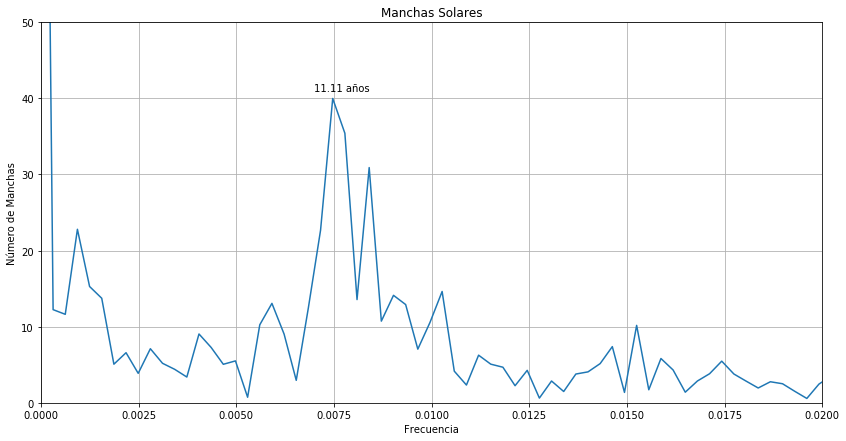

In [17]:
#Aplicar la transformada de Fourier
N= 3213
T = 1.0

#Tamaño de la imagen
fig = plt.gcf()
fig.set_size_inches(13, 8)

y = df["Manchas"] 
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)

graf = plt.plot(xf, 2.0/N *abs(yplot))
plt.xlim(0,0.02)
plt.ylim(0,50)
plt.grid(True)

plt.xlabel('Frecuencia')
plt.ylabel('Número de Manchas')
plt.title('Manchas Solares')
plt.text(0.007,41,'11.11 años')

fig = plt.gcf()
fig.set_size_inches(14, 7)
plt.show()

In [8]:
yf/1606.5

array([ 165.84712107 +0.j        ,    7.63698503 +9.56584339j,
         -1.97516571+11.45744489j, ...,   -3.63218840+22.50799815j,
         -1.97516571-11.45744489j,    7.63698503 -9.56584339j])

In [9]:
r= np.absolute(yf/1606.5)

In [10]:
r[r[:,] > 38]

array([ 165.84712107,   39.98723321,   39.98723321])

In [11]:
print(np.where(r[:,]>38))
a= r[r[:,]>38]
a

(array([   0,   24, 3189], dtype=int64),)


array([ 165.84712107,   39.98723321,   39.98723321])

In [12]:
F_11AÑOS=  xf[int(1606.5 + 24),]
F2=xf[int(1606.5+27),]
F3=xf[int(1606.5+18)]

In [13]:
print('Periodo:',1/(F_11AÑOS*12), 'Años')
print('Otros periodos cercanos:','|',1/(F2*12),'años|',1/(F3*12),'años')

Periodo: 11.15625 Años
Otros periodos cercanos: | 9.91666666667 años| 14.875 años


In [14]:
print()
print('Primer Armónico')
print('Amplitud=',np.absolute(yf[0,]/3213))
print('frecuencia=', xf[int(1606.5 +0),])
print('periodo=', 1/xf[int(1606.5 +0),])

print()
print('Segundo armónico')
print('Amplitud=',np.absolute(yf[3,]/3213))
print('frecuencia=', xf[int(1606.5 +3),])
print('periodo=', 1/xf[int(1606.5 +3),])

print()
print('Segundo armónico')
print('Amplitud=',np.absolute(yf[4,]/3213))
print('frecuencia=', xf[int(1606.5 +4),])
print('periodo=', 1/xf[int(1606.5 +4),])

print()
print('Tercer armónico')
print('Amplitud=',np.absolute(yf[23,]/3213))
print('frecuencia=', xf[int(1606.5 +23),])
print('periodo=', 1/xf[int(1606.5 +23),])

print()
print('Cuarto armónico')
print('Amplitud=',np.absolute(yf[24,]/3213))
print('frecuencia=', xf[int(1606.5 +24),])
print('periodo=', 1/xf[int(1606.5 +24),])

print()
print('Quinto armónico')
print('Amplitud=',np.absolute(yf[25,]/3213))
print('frecuencia=', xf[int(1606.5 +25),])
print('periodo=', 1/xf[int(1606.5 +25),])

print()
print('Sexto armónico')
print('Amplitud=',np.absolute(yf[27,]/3213))
print('frecuencia=', xf[int(1606.5 +27),])
print('periodo=', 1/xf[int(1606.5 +27),])



Primer Armónico
Amplitud= 82.9235605353
frecuencia= 0.0
periodo= inf

Segundo armónico
Amplitud= 11.3995918066
frecuencia= 0.00093370681606
periodo= 1071.0

Segundo armónico
Amplitud= 7.64140606831
frecuencia= 0.00124494242141
periodo= 803.25

Tercer armónico
Amplitud= 11.3390760528
frecuencia= 0.00715841892312
periodo= 139.695652174

Cuarto armónico
Amplitud= 19.9936166043
frecuencia= 0.00746965452848
periodo= 133.875

Quinto armónico
Amplitud= 17.7099160016
frecuencia= 0.00778089013383
periodo= 128.52

Sexto armónico
Amplitud= 15.4540189405
frecuencia= 0.00840336134454
periodo= 119.0


C:\Users\nayely\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in double_scalars


In [15]:
A1=np.angle(yf[24,]/3213)
A1

0.56801906848676587